In [19]:
from pathlib import Path

import pandas as pd
import seaborn as sns
from helpers import calculate_metric, combine_folds, create_pivot_tables
from matplotlib import pyplot as plt

from neuralhydrology.evaluation import metrics
from neuralhydrology.utils.nh_results_ensemble  import _get_results_file


In [28]:
base_path = Path('/Users/sho108/Desktop/r/work/sho108/neuralhydrology_workflow/runs')

static_attributes = [
    '',
    'Are',  # Catchment Area
    'Pme',  # Precipitation Mean
    'Pet',  # PET Mean
    # 'Run',  # Runoff Ratio
    # 'Slo',  # Slope FDC
    'Str',  # Stream Elasticity
    'Bas',  # Baseflow Index
    'Hpf',  # High Precipitation Frequency
    'Hpd',  # High Precipitation Duration
    # 'Lpf',  # Low Precipitation Frequency
    'Lpd',  # Low Precipitation Duration
    # 'Mea',  # Mean Slope Percentage
    # ##'Ksa',  # Saturation Hydraulic Conductivity (Ksat) Not producd correctly
    # 'Ari',  # Aridity Index
    # 'Pse',  # Precipitation Seasonality Index
]

#static_attributes = ['']

dynamic_predictors = ['Pra',
              'PraEts',
              'Prs',
              'PrsEts',
              'PrsEas',
              ]

dynamic_predictors = ['PraEts',
              ]

run_list = [
    {'dir': base_path/('temporal_twofold_{fold:d}'+f'_PraEts_{sa}_0702_101224'), 'dim_name':'temporal'} for sa in static_attributes
]



run_list


[{'dir': PosixPath('/Users/sho108/Desktop/r/work/sho108/neuralhydrology_workflow/runs/temporal_twofold_{fold:d}_PraEts__0702_101224'),
  'dim_name': 'temporal'},
 {'dir': PosixPath('/Users/sho108/Desktop/r/work/sho108/neuralhydrology_workflow/runs/temporal_twofold_{fold:d}_PraEts_Are_0702_101224'),
  'dim_name': 'temporal'},
 {'dir': PosixPath('/Users/sho108/Desktop/r/work/sho108/neuralhydrology_workflow/runs/temporal_twofold_{fold:d}_PraEts_Pme_0702_101224'),
  'dim_name': 'temporal'},
 {'dir': PosixPath('/Users/sho108/Desktop/r/work/sho108/neuralhydrology_workflow/runs/temporal_twofold_{fold:d}_PraEts_Pet_0702_101224'),
  'dim_name': 'temporal'},
 {'dir': PosixPath('/Users/sho108/Desktop/r/work/sho108/neuralhydrology_workflow/runs/temporal_twofold_{fold:d}_PraEts_Str_0702_101224'),
  'dim_name': 'temporal'},
 {'dir': PosixPath('/Users/sho108/Desktop/r/work/sho108/neuralhydrology_workflow/runs/temporal_twofold_{fold:d}_PraEts_Bas_0702_101224'),
  'dim_name': 'temporal'},
 {'dir': Posi

In [29]:
from pathlib import Path
from glob import glob

def get_dir(s: str) -> list[Path]:
    """
    Get the directory paths based on the provided glob pattern.

    Parameters:
    - s (str): The glob pattern for the directory.

    Returns:
    - list[Path]: A list of Path objects representing the directories found.

    Raises:
    - ValueError: If no matching directory is found.
    """
    dir_list = [Path(x) for x in glob(s)]
    if dir_list:
        return dir_list
    else:
        raise ValueError(f"No matching directory found for the given pattern: '{s}'.")

def get_unique_dir(s: str) -> Path:
    """
    Get the unique directory path based on the provided glob pattern.

    Parameters:
    - s (str): The glob pattern for the directory.

    Returns:
    - Path: The Path object representing the unique directory.

    Raises:
    - ValueError: If multiple matching directories are found or no matching directory is found.
    """
    dir_list = get_dir(s)
    if len(dir_list) == 1:
        return dir_list[0]
    elif len(dir_list) > 1:
        dir_paths = '\n'.join(str(path) for path in dir_list)
        raise ValueError(f"Multiple matching directories found for the given pattern: '{s}':\n{dir_paths}")
    else:
        raise ValueError(f"No matching directory found for the given pattern: '{s}'.")


In [30]:
import pickle
metric_df_list = []
for run in run_list:
    results = {}
    for fold in (0, 1):
        run_dir = get_unique_dir(str(run['dir']).format(fold=fold))

        
        result_dir= _get_results_file(run_dir)
        results[fold] = pickle.load(open(result_dir, 'rb'))

         
        df = combine_folds(results, dim_name=run['dim_name'])
        sim, obs = create_pivot_tables(df)
        metric_df = calculate_metric(sim, obs, metrics.nse, name=run['dir'].name)
    metric_df_list.append(metric_df)

all_metrics_df = pd.concat(metric_df_list, axis=1)

# sort them based on the means:
all_metrics_df[all_metrics_df.mean().sort_values(ascending=False).keys()]

,temporal_twofold_{fold:d}_PraEts_Bas_0702_101224,temporal_twofold_{fold:d}_PraEts_Str_0702_101224,temporal_twofold_{fold:d}_PraEts_Pme_0702_101224,temporal_twofold_{fold:d}_PraEts__0702_101224,temporal_twofold_{fold:d}_PraEts_Pet_0702_101224,temporal_twofold_{fold:d}_PraEts_Lpd_0702_101224,temporal_twofold_{fold:d}_PraEts_Are_0702_101224,temporal_twofold_{fold:d}_PraEts_Hpd_0702_101224,temporal_twofold_{fold:d}_PraEts_Hpf_0702_101224
102101A,-0.411214,-0.239296,-0.845752,-0.345822,-0.353145,-0.663143,-0.807295,-0.444324,-0.765060
104001A,0.529653,0.451871,0.511975,0.485691,0.556831,0.519357,0.413969,0.490048,0.126893
105101A,0.447446,0.420638,0.440593,0.387237,0.458310,0.411729,0.414449,0.395320,0.402202
105102A,0.103142,0.048096,-0.165436,-0.339288,-0.273226,-0.117740,-0.404324,-0.899026,-1.004822
105105A,0.708608,0.712932,0.694853,0.582536,0.677336,0.664733,0.681974,0.651235,0.674550
...,...,...,...,...,...,...,...,...,...
G8200045,0.270142,0.281895,0.002981,0.131112,-0.002175,0.164770,-0.117840,0.108183,-0.204216
G8210010,-0.191587,0.263761,-0.130118,-0.263610,-0.261113,-0.208919,-0.540320,-0.193228,-0.533973
G9030124,0.298818,0.391837,0.374185,0.377365,0.371961,0.255190,0.263038,0.287360,0.112095
G9030250,0.485073,0.389563,0.431817,0.438439,0.473082,0.413025,0.019875,0.296445,0.481165


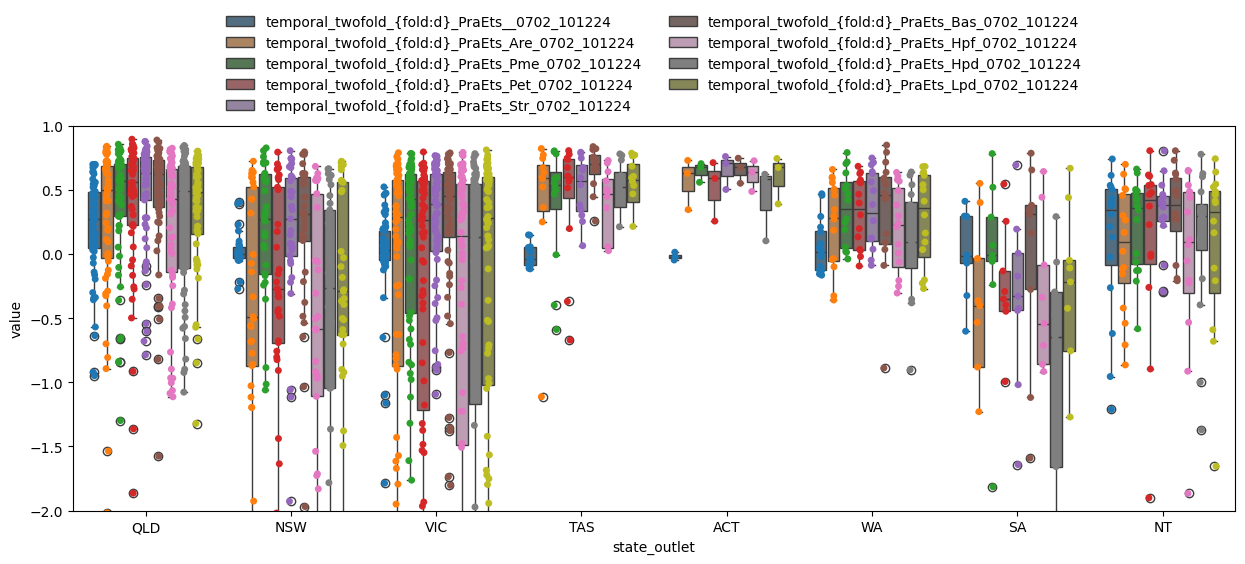

In [31]:
# Load attribute data
attr_df = pd.read_csv('/Users/sho108/Desktop/z/Data/CAMELS_AUS/CAMELS_AUS_Attributes&Indices_MasterTable.csv', index_col=0)

# Combine metric and attribute data
data = pd.concat([all_metrics_df, attr_df], axis=1).reset_index()

# Melt the data for better visualization
data_melted = data.melt(value_vars=all_metrics_df.columns, id_vars=['drainage_division', 'river_region', 'state_outlet'])

# Set up the plotting environment
plt.figure(figsize=(15, 5))

# Specify the variable for x-axis
x = 'state_outlet'

# Create a boxplot and stripplot using seaborn
hue_order = None# all_metrics_df.median().sort_values(ascending=False).keys()
ax = sns.boxplot(data_melted, y='value', x=x, hue='variable', hue_order=hue_order, saturation=0.3, gap=0.1)
sns.stripplot(data=data_melted, y='value', x=x, hue='variable', dodge=True, ax=ax, legend=False)

# Set y-axis limits
plt.ylim(-2, 1)

# Move legend to a more suitable position
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)

# Show the plot
plt.show()


Text(0, 0.5, 'nse')

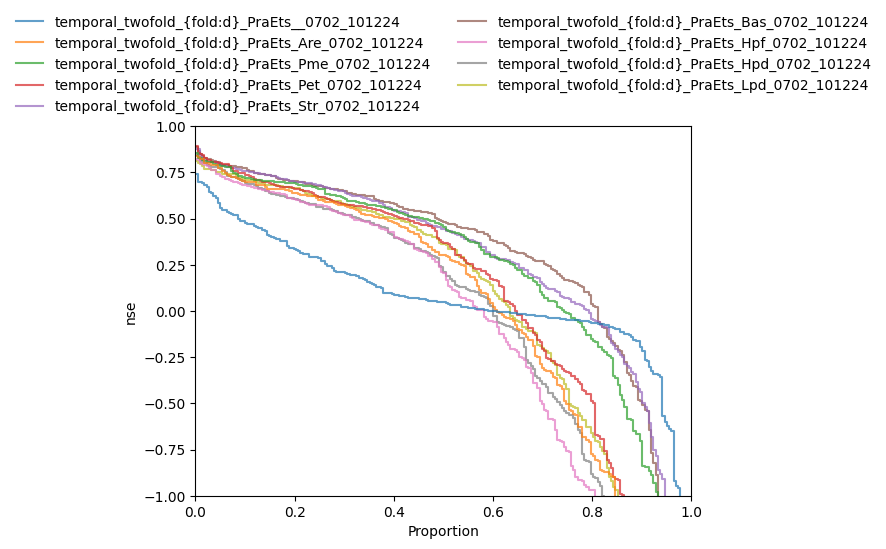

In [32]:
#value_vars = all_metrics_df.columns
#data_melted = data.melt(value_vars=value_vars, id_vars=['drainage_division', 'river_region', 'state_outlet'])

x = 'state_outlet'
ax = sns.ecdfplot(data_melted , y='value', hue='variable', hue_order=hue_order, complementary=True, alpha=0.7)
ax.set_ylim(-1,1)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False,)
plt.ylabel('nse')